In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import *
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["species"] = iris.target

In [6]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


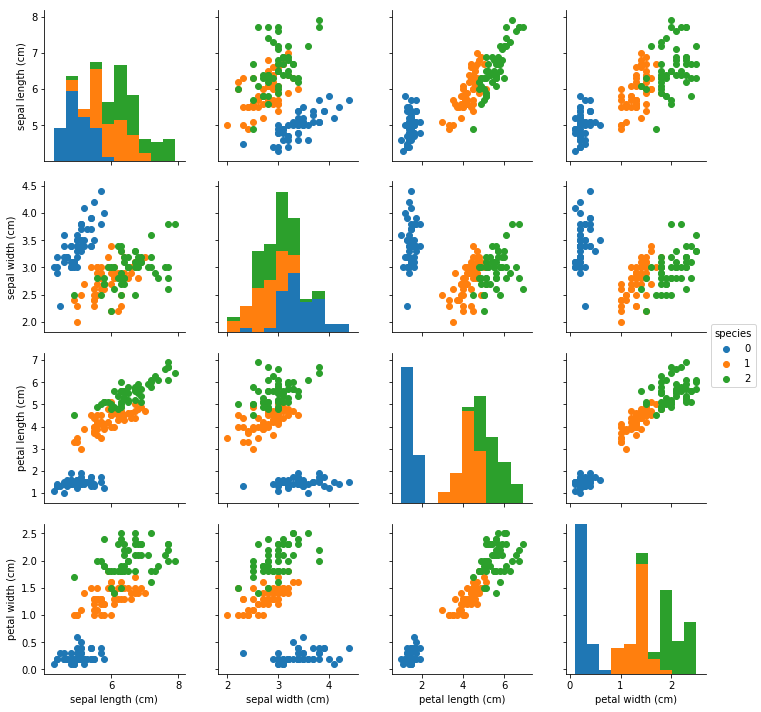

In [5]:
g = sns.PairGrid(iris_df, hue="species", vars=iris.feature_names)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
metrics.confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 11,  5],
       [ 0,  0,  9]])

In [10]:
print("Accuracy: %f" % metrics.accuracy_score(y_test, y_pred))
print("Precision: %f" % metrics.precision_score(y_test, y_pred, average="macro"))
print("Recall: %f" % metrics.recall_score(y_test, y_pred, average="macro"))
print("F1-score: %f" % metrics.f1_score(y_test, y_pred, average="macro"))

Accuracy: 0.868421
Precision: 0.880952
Recall: 0.895833
F1-score: 0.865808


# Cross Validation

In [11]:
model = LogisticRegression(random_state=0)
cross_val_score(model, iris.data, iris.target, cv=10, scoring="accuracy")

array([1.        , 1.        , 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.8       , 0.93333333, 1.        , 1.        ])

In [13]:
cross_val_score(model, iris.data, iris.target, cv=LeaveOneOut()).mean()

0.9533333333333334